In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                            30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                            33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                            35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                            39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 
                            11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                            390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                            600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                            685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                            850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                            6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
### 독립 변수, 종속 변수 생성

fish_data = [[l, w] for l , w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [3]:
# 넘파이 라이브러리 정의
import numpy as np

In [4]:
### 넘파이 라이브러리로 독립변수 생성
# - column_stack() : 여러 리스트의 각 인덱스 위치끼리 리스트로 묶는 함수 zip과 유사
# - 결과 타입 : 넘파이 array 타입
fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data.shape)
print(fish_data)

(49, 2)
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [5]:
### 종속 변수를 넘파이 함수 이용해서 만들기
# - concatenate() : 배열 합치기 > 결과값 넘파이 배열(array)
# - ones(35) : 1을 35개 만들기 -> 리스트로 반환
# - zeros(14) : 0을 14개 만들기 -> 리스트로 반환
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target.shape)
print(fish_target)

(49,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [6]:
### 사용할 데이터셋 : 독립, 종속 변수 데이터

fish_data.shape, fish_target.shape

((49, 2), (49,))

#### 데이터를 섞으면서 분리시키기 (라이브러리 사용)

In [7]:
### 라이브러리 정의 (전처리 라이브러리)
# - train_test_split() : 데이터 기반의 머신러닝 및 딥러닝에서 사용되는 함수
# - 데이터를 랜덤하게 섞으면서 분리(훈련 : 테스트) 하는 함수 : 2개로만 분리함
from sklearn.model_selection import train_test_split

In [8]:
### 분리 기준 -> 훈련 : 테스트 = 75% : 25%로 분리
# - 분리 기준은 "비율"
# - 결과값 순서 : 훈련독립, 테스트독립, 훈련종속,  테스트종속 순서로 반환됨
#                 2차원,     2차원,     1차원,     1차원
train_input, test_input, train_target, test_target = train_test_split(
    # - 독립변수 전체 데이터
    fish_data, 
    # - 종속변수 전체 데이터
    fish_target,
    # - 훈련 또는 테스트를 기준으로 분리할 기준 비율 (둘중 하나 사용)
    # train_size=0.75,
    test_size=0.25,
    # - 랜덤 규칙
    random_state=42,
    # - 종속변수의 범주의 값을 편향이 일어나지 않도록 비율 조정
    #  (주로 분류분석에서 사용하며, 회귀에는 잘 사용 안함)
    stratify=fish_target
)

In [9]:
### 데이터 차원 확인하기
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(36, 2) (36,)
(13, 2) (13,)


#### 모델 훈련하기

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
### 1. 훈련 모델 생성
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [12]:
### 2. 훈련시키기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [13]:
### 3. 훈련정확도 및 테스트 정확도 확인
train_score = kn.score(train_input, train_target)
test_score = kn.score(test_input, test_target)
train_score, test_score

(1.0, 1.0)

In [14]:
### 4. 테스트 데이터로 예측 해보기
test_pred = kn.predict(test_input)
print(test_pred)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
### 임의 데이터로 예측하기
# - 길이 25cm, 무게 150g 으로 예측 후 결과 확인하기
kn.predict([[25, 150]])

### 결과값 (y) = 0, 즉 빙어로 분류됨

array([0.])

#### 훈련(길이, 무게) 데이터와 임의 데이터(길이, 무게)를 산점도로 그리기

In [16]:
### 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

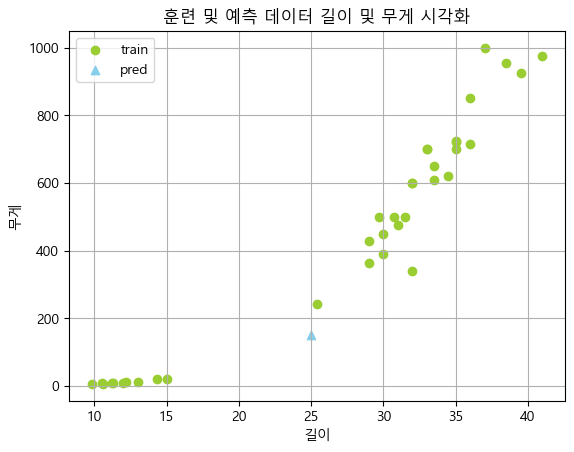

In [17]:
### 훈련 및 테스트 데이터가 잘 섞였는지 확인
plt.title("훈련 및 예측 데이터 길이 및 무게 시각화")
plt.scatter(train_input[:, 0], train_input[:, 1], c="yellowgreen", label="train")
plt.scatter(25, 150, marker="^", c="skyblue", label="pred")

plt.xlabel("길이")
plt.ylabel("무게")
plt.grid()
plt.legend()
plt.show()

### (해석)
# - 예측하고자 하는 데이터의 위치는 도미쪽에 가깝기에 
#   시각적으로 도미와 가까운 이웃이 더 많음을 알 수 있음
# - 그러나, predict() 예측 결과는 빙어(0)의 값을 나타내고 있음
# - 즉, 가까운 이웃이 빙어쪽이 많다는 의미로 해석됨
# - 따라서, 예측에 사용된 이웃을 확인해 보아야 함

In [18]:
### 예측 데이터와 가장 가까운 이웃 확인하기
# - 이웃의 갯수는 기본값을 사용하였기에 5개의 이웃 결과 확인
# - 반환값 
#   --> 첫번째값 : 이웃과의 거리
#   --> 두번째값 : 훈련데이터에서 실제 이웃으로 사용된 값의 인덱스 위치
distances, indexes = kn.kneighbors([[25, 150]])
distances, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]], dtype=int64))

In [19]:
train_input

array([[  29.7,  500. ],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  11.3,    8.7],
       [  39.5,  925. ],
       [  29. ,  430. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  31. ,  475. ],
       [  35. ,  720. ],
       [  37. , 1000. ],
       [  11.2,    9.8],
       [  34.5,  620. ],
       [  12. ,    9.8],
       [  29. ,  363. ],
       [  33. ,  700. ],
       [  30.7,  500. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  14.3,   19.7],
       [  31.5,  500. ],
       [  25.4,  242. ],
       [   9.8,    6.7],
       [  32. ,  600. ],
       [  10.5,    7.5],
       [  33.5,  610. ],
       [  10.6,    7. ],
       [  35. ,  700. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  13. ,   12.2],
       [  30. ,  450. ],
       [  32. ,  340. ],
       [  15. ,   19.9],
       [  30. ,  390. ],
       [  41. ,  975. ]])

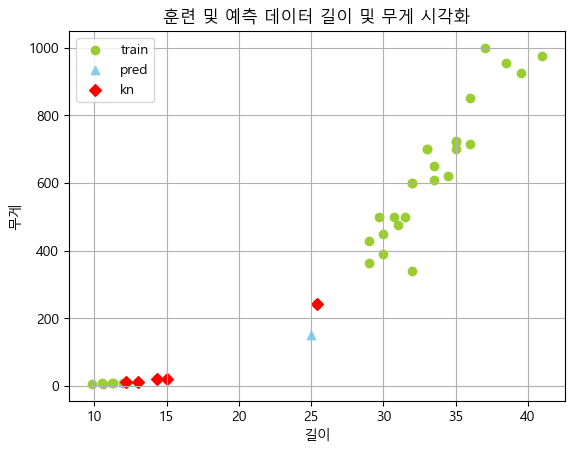

In [20]:
### 훈련 및 테스트 데이터가 잘 섞였는지 확인
plt.title("훈련 및 예측 데이터 길이 및 무게 시각화")
plt.scatter(train_input[:, 0], train_input[:, 1], c="yellowgreen", label="train")
plt.scatter(25, 150, marker="^", c="skyblue", label="pred")

### 사용된 이웃 산점도로 그리기 
# - 색상은 빨강색으로, 마커는 D 사용
# - 훈련데이터에서 이웃으로 사용된 indexes의 결과값을 이용하여 추출하면 됨
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], 
            marker="D", c="red", label="kn")

plt.xlabel("길이")
plt.ylabel("무게")
plt.grid()
plt.legend()
plt.show()

### (해석)
# - x축의 숫자의 범위와, y축의 숫자의 범위가 매우 크게 차이남
# - x축은 1단위, y축은 100단위
# - 각데이터의 거리는 x축보다 y축의 영향을 더 받고 있음
# - 임의 데이터와 y축간의 거리가 가까운 빙어쪽이 더 많이 선택된 이유는
#   높이, 즉 y축의 값이 작은 쪽과 짧은 거리로 계산됨
# - x와 y축의 스케일 단위가 다르기 때문에 나타나는 현상
# - 이를 해결하기 위한 방법
#   *** 스케일링(정규화 == 표준화) 전처리가 필요함 (값의 범위를 표준화 시킴)

#### 훈련(학습) 시키기
- 훈련(학습) 순서
    - 1. 데이터 수집
    - 2. 데이터 전처리 및 탐색
    -   3. 데이터 가공
            - 3.1. 독립변수, 종속변수 생성
            - 3.2. 훈련데이터, 테스트데이터로 분류(또는 훈련, 검증, 테스트 데이터로 분류)
                - train_test_split() 함수 사용
            - 3.3. 스케일링 처리(정규화 == 표준화) : 3.1 이후 또는 3.2 이후에 언제든지 가능
                - 독립변수에 대해서만 스케일링 처리를 하며, 종속변수는 절대 변경하면 안됩니다.
    - 4. 훈련모델 생성
    - 5. 훈련 시키기
        - 훈련 데이터 사용
    - 6. 훈련모델 정확도 검증
        - 테스트 데이터 사용 또는 검증 데이터 사용
        - 훈련 정확도 및 테스트(검증) 정확도 확인 후 비교
        - 6-1. 튜닝
        - 6-2. 성능평가
    - 7. 예측하기(임의 데이터로 정답 잘 맞추는지 검증)
        - 임의 데이터, 즉 테스트 데이터를 의미
        - 7-1. 최종 정확도 검증(테스트 정확도 검증)
        - 7-2. 성능평가

#### 3-3. 스케일링 처리(정규화 == 표준화)

- 스케일링
    - 정규화 또는 표준화라고 칭합니다.
    - 스케일링 처리 시점 : 특성들 간의 데이터값의 단위 편차가 큰 경우에 처리 합니다.
    - 일반적으로 머신러닝을 진행하는 경우에는 수행하는 필수 단계라고 생각하면 됩니다.
        - (최초에는 스케일링 없이 진행 훈련 진행 > 그 다음 스케일링 후 진행 > 두개의 훈련 성능 비교)

In [21]:
### 스케일링 표준화 계산공식
# - 표준화 = (각 데이터 - 데이터 전체 평균) / 데이터 전체 표준편차
# - 표준화 : 각 데이터가 원점(0)에서 몇 표준편차 만큼 떨어져 있는지를 나타낸 값
# - 평균과 표준편차는 numpy의 함수 사용

In [22]:
### 훈련독립변수 데이터 전체 평균 구하기
# - 훈련독립변수 데이터에 있는 2개의 열(길이, 무게) 각각에 대한 전체 평균을 구해서 반환
# - axis=0 : 각 열의 행단위 평균을 의미
mean = np.mean(train_input, axis=0)
mean

array([ 27.29722222, 454.09722222])

In [23]:
### 훈련 독립변수 데이터 전체 표준편차
# - 각 길이와 무게에 대한 전체 표준편차를 반환함
std = np.std(train_input, axis=0)
std

array([  9.98244253, 323.29893931])

In [24]:
### 표준화(표준점수) = (각 데이터 - 데이터 전체 평균) / 데이터 전체 표준편차
train_scaled = (train_input - mean) / std
train_scaled.shape

(36, 2)

In [25]:
### 임의 데이터(25, 150) 표준화 하기
new = ([25, 150] - mean) / std
new[0], new[1]

(-0.23012626562373972, -0.9406069282852298)

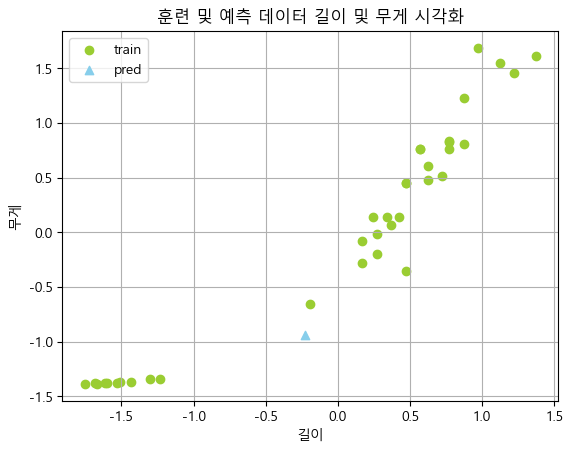

In [26]:
### 훈련 독립변수 표준화 데이터와 임의 데이터(25, 150)를 산점도로 표현
### -- 스케일링된 데이터로 변경되었기 때문에, 기존의 이웃에 대한 부분은 생각하지 않아도 됨
### 훈련 및 테스트 데이터가 잘 섞였는지 확인
plt.title("훈련 및 예측 데이터 길이 및 무게 시각화")
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c="yellowgreen", label="train")
plt.scatter(new[0], new[1], marker="^", c="skyblue", label="pred")

plt.xlabel("길이")
plt.ylabel("무게")
plt.grid()
plt.legend()
plt.show()

### (해석)

In [27]:
### 1. 훈련모델 생성
kn = KNeighborsClassifier(n_neighbors=21)

### 2. 훈련시키기
kn.fit(train_scaled, train_target)

### 3. 훈련 및 테스트 정확도 확인
train_score = kn.score(train_scaled, train_target)

### 테스트 독립변수 스케일링 처리 후 정확도 확인
# - 테스트 독립변수는 훈련독립변수를 이용해서 만들어진 표준점수를 그대로 사용
# - 모든 데이터의 변경은 훈련데이터로 진행하며, 
#   이후 다른(검증 또는 테스트) 데이터들은 훈련데이터로 진행한 결과물을 이용만 함
#   ***** 이유 : 훈련데이터로 만들어진 표준점수 데이터를 이용해서 훈련했기 때문
#              : 다른 데이터들로 훈련데이로 만들어진 표준점수로 변환해야 함
test_scaled = (test_input - mean) / std
test_score = kn.score(test_scaled, test_target)

### 4. 임의 데이터(25, 150)로 예측하기
new_pred = kn.predict([new])

### 5. 사용된 이웃 데이터 추출하기
d, idx = kn.kneighbors([new])

print(f"훈련정확도:{train_score}, 테스트정확도:{test_score}, 사용된 이웃인덱스:{idx}")

훈련정확도:0.7222222222222222, 테스트정확도:0.6923076923076923, 사용된 이웃인덱스:[[21 14 34 32  5 31 33 19  8  0 16 20 30  1 13  3 11 26 24 23 28]]


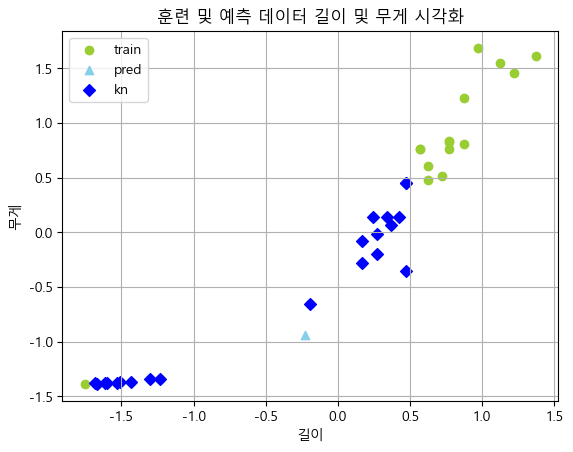

In [28]:
### 6. 훈련데이터(길이, 무게), 임의데이터(길이, 무게), 사용된 이웃 산점도 그리기
plt.title("훈련 및 예측 데이터 길이 및 무게 시각화")
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c="yellowgreen", label="train")
plt.scatter(new[0], new[1], marker="^", c="skyblue", label="pred")

plt.scatter(train_scaled[idx, 0], train_scaled[idx, 1], marker="D", c="blue", label="kn")

plt.xlabel("길이")
plt.ylabel("무게")
plt.grid()
plt.legend()
plt.show()